## **Introducción**

El Dataset muestra distintos atributos de ciertos vinos y se trata con el mismo poder tener una idea de precio y puntuacion segun los atributos mostrados.
En esta primera etapa, se buscar informacion sobre precios y puntos obtenidos por los mismos relacionandolos por su variedad y el pais de origen.

Columnas:

country: pais de elaboracion del vino.

description: descripcion hecha por la persona de cata el vino.

designation: tipo de vino.

points: puntos otorgados en la cata.

price: precio del vino en el mercado.

province: provincia donde se elabora el vino.

region_1: region donde se encuentra el viñedo.

region_2: region general.

taster_name: nombre de la persona que cata el vino.

taster_twitter_handle: direccion de Twitter de la persona que cata el vino.

title: nombre del vino.

variety: variedad de la uva con la que se elaboro el vino.

winery: nombre de la bodega que elaboro el vino.


En este trabajo me propongo a responder las siguientes preguntas:

Pregunta 1:

¿Existe una relación clara entre el precio de un vino y su puntuación?

Pregunta 2:

¿Qué países o variedades logran mejores puntuaciones en promedio?



Procedemos a cargar el Dataset

In [1]:
# INGRESAR MI TOKEN DE KAGGLE A COLAB
from google.colab import files
files.upload()  # Selecciona el archivo kaggle.json

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"osvaldogutierrez","key":"65b739c7d18dee1d54e62e33f35d4a7d"}'}

In [2]:
# Configurar y descargar el dataset
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [3]:
!kaggle datasets download -d zynicide/wine-reviews

Dataset URL: https://www.kaggle.com/datasets/zynicide/wine-reviews
License(s): CC-BY-NC-SA-4.0


In [4]:
# Descomprimir el archivo
!unzip -q wine-reviews.zip -d ./datos

Cargamos las librerias

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
# Procedemos a cargar el dataset y presentar sus primeros valores.
df = pd.read_csv('./datos/winemag-data-130k-v2.csv')
df.head()

Unnamed: 0   country                                        description  \
0           0     Italy  Aromas include tropical fruit, broom, brimston...   
1           1  Portugal  This is ripe and fruity, a wine that is smooth...   
2           2        US  Tart and snappy, the flavors of lime flesh and...   
3           3        US  Pineapple rind, lemon pith and orange blossom ...   
4           4        US  Much like the regular bottling from 2012, this...   

                          designation  points  price           province  \
0                        Vulkà Bianco      87    NaN  Sicily & Sardinia   
1                            Avidagos      87   15.0              Douro   
2                                 NaN      87   14.0             Oregon   
3                Reserve Late Harvest      87   13.0           Michigan   
4  Vintner's Reserve Wild Child Block      87   65.0             Oregon   

              region_1           region_2         taster_name  \
0                 Etna                NaN       Kerin O’Keefe   
1                  NaN                NaN          Roger Voss   
2    Willamette Valley  Willamette Valley        Paul Gregutt   
3  Lake Michigan Shore                NaN  Alexander Peartree   
4    Willamette Valley  Willamette Valley        Paul Gregutt   

  taster_twitter_handle                                              title  \
0          @kerinokeefe                  Nicosia 2013 Vulkà Bianco  (Etna)   
1            @vossroger      Quinta dos Avidagos 2011 Avidagos Red (Douro)   
2           @paulgwine       Rainstorm 2013 Pinot Gris (Willamette Valley)   
3                   NaN  St. Julian 2013 Reserve Late Harvest Riesling ...   
4           @paulgwine   Sweet Cheeks 2012 Vintner's Reserve Wild Child...   

          variety               winery  
0     White Blend              Nicosia  
1  Portuguese Red  Quinta dos Avidagos  
2      Pinot Gris            Rainstorm  
3        Riesling           St. Julian  
4      Pinot Noir         Sweet Cheeks

A continuacion procedemos a hacer un Analisis del Dataset

In [7]:
# Ver el tamaño del dataset
print("Dimensiones del dataset:", df.shape)

Dimensiones del dataset: (129971, 14)


In [8]:
# Ver el tipo de datos y si hay valores nulos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129971 entries, 0 to 129970
Data columns (total 14 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             129971 non-null  int64  
 1   country                129908 non-null  object 
 2   description            129971 non-null  object 
 3   designation            92506 non-null   object 
 4   points                 129971 non-null  int64  
 5   price                  120975 non-null  float64
 6   province               129908 non-null  object 
 7   region_1               108724 non-null  object 
 8   region_2               50511 non-null   object 
 9   taster_name            103727 non-null  object 
 10  taster_twitter_handle  98758 non-null   object 
 11  title                  129971 non-null  object 
 12  variety                129970 non-null  object 
 13  winery                 129971 non-null  object 
dtypes: float64(1), int64(2), object(11)


In [9]:
# Estadísticas descriptivas de las variables numéricas
df.describe()

Unnamed: 0         points          price
count  129971.000000  129971.000000  120975.000000
mean    64985.000000      88.447138      35.363389
std     37519.540256       3.039730      41.022218
min         0.000000      80.000000       4.000000
25%     32492.500000      86.000000      17.000000
50%     64985.000000      88.000000      25.000000
75%     97477.500000      91.000000      42.000000
max    129970.000000     100.000000    3300.000000

In [10]:
# Ver cantidad de valores nulos por columna
print("\nCantidad de valores nulos por columna:")
print(df.isnull().sum())


Cantidad de valores nulos por columna:
Unnamed: 0                   0
country                     63
description                  0
designation              37465
points                       0
price                     8996
province                    63
region_1                 21247
region_2                 79460
taster_name              26244
taster_twitter_handle    31213
title                        0
variety                      1
winery                       0
dtype: int64


En este trabajo, teniendo en cuenta las preguntas a responder, nos interesan los valores nulos de las columnas referidas a Precio, Pais y Variedad. Por lo tanto prodecemos a eliminar dichas filas teniendo en cuenta que su volumen no es significativo con relacion a la cantidad de observaciones que tiene el Dataset

In [11]:
# Eliminar filas donde 'price', 'country' o 'variety' sean nulos
df = df.dropna(subset=['price', 'country', 'variety'])

# Verificamos que ya no haya nulos en esas columnas
print(df[['price', 'country', 'variety']].isnull().sum())


price      0
country    0
variety    0
dtype: int64


Con nuestro conocimiento de vinos sabemos que algunos ellos tienen precio muy por encima de la media, por tal motivo procedemos a hacer un analisis de los mismos como de su puntuacion en busca de Outliers.

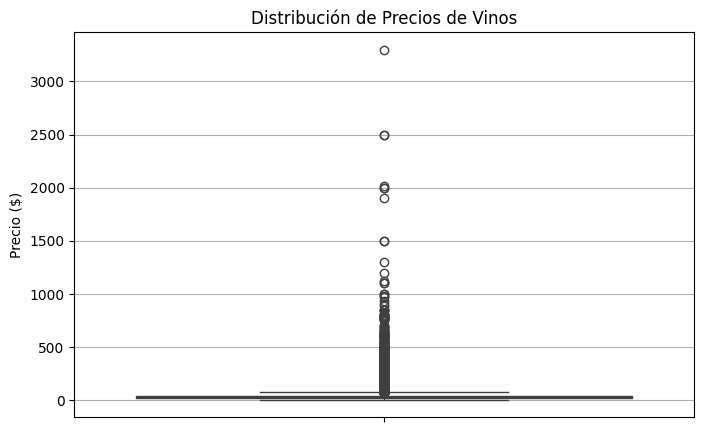

In [12]:
# Boxplot Precio
plt.figure(figsize=(8,5))
sns.boxplot(data=df, y='price')
plt.title('Distribución de Precios de Vinos')
plt.ylabel('Precio ($)')
plt.grid(axis='y')
plt.show()

Debido a que salio muy amontonado procedemos a limitar los valores del eje de precio

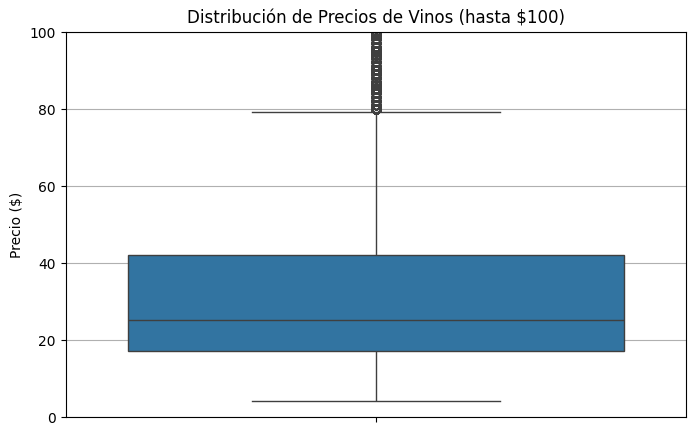

In [13]:
# Boxplot Precio con límite en el eje Y
plt.figure(figsize=(8,5))
sns.boxplot(data=df, y='price')
plt.title('Distribución de Precios de Vinos (hasta $100)')
plt.ylabel('Precio ($)')
plt.ylim(0, 100)  # Acá limitamos de 0 a 100 dólares
plt.grid(axis='y')
plt.show()


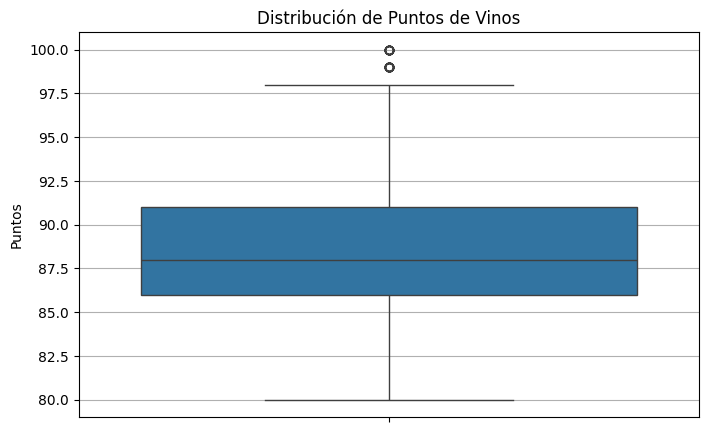

In [14]:
# Boxplot Puntos
plt.figure(figsize=(8,5))
sns.boxplot(data=df, y='points')
plt.title('Distribución de Puntos de Vinos')
plt.ylabel('Puntos')
plt.grid(axis='y')
plt.show()


Teniendo en cuenta el resultado de los graficos procedemos a elimiar los valores que son outliers:

Precios: consideramos outliers los vinos con precio mayor a 75 dólares.

Puntos: consideramos outliers los vinos con más de 96 puntos.

In [15]:
# Filtrar para eliminar outliers
df = df[(df['price'] <= 75) & (df['points'] <= 96)]

# Verificamos rápidamente
print(df[['price', 'points']].describe())


               price         points
count  113270.000000  113270.000000
mean       28.949501      88.166770
std        15.957591       2.895033
min         4.000000      80.000000
25%        16.000000      86.000000
50%        25.000000      88.000000
75%        39.000000      90.000000
max        75.000000      96.000000


# **Exploración**

Con el objetivo de ir teniendo una nocion de los datos que presenta en Dataste con relacion a:

- Si hay alguna tendencia general (por ejemplo, que a mayor precio haya mejores puntajes).

- Qué tanto se dispersan los datos (si hay vinos baratos con buenos puntos o caros con puntos bajos).

Procedemos a realizar el siguiente grafico.

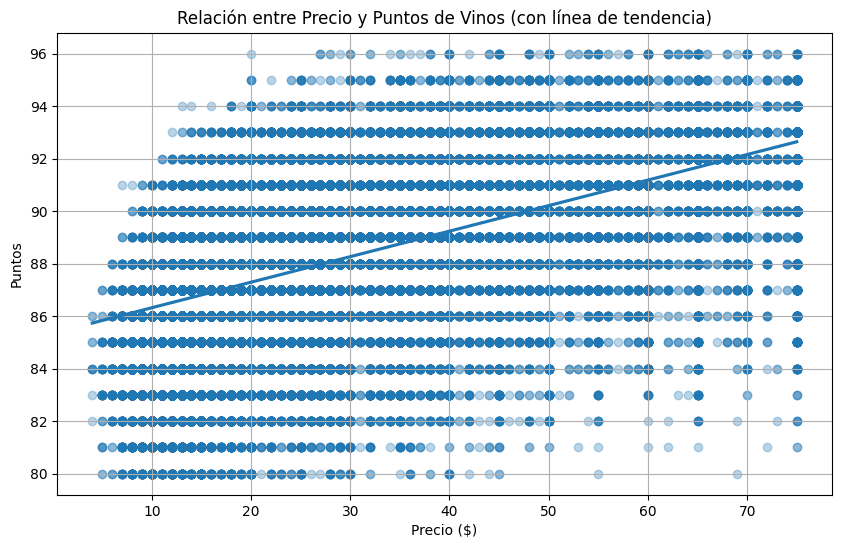

In [16]:
plt.figure(figsize=(10,6))
sns.regplot(x='price', y='points', data=df, scatter_kws={'alpha':0.3})
plt.title('Relación entre Precio y Puntos de Vinos (con línea de tendencia)')
plt.xlabel('Precio ($)')
plt.ylabel('Puntos')
plt.grid(True)
plt.show()


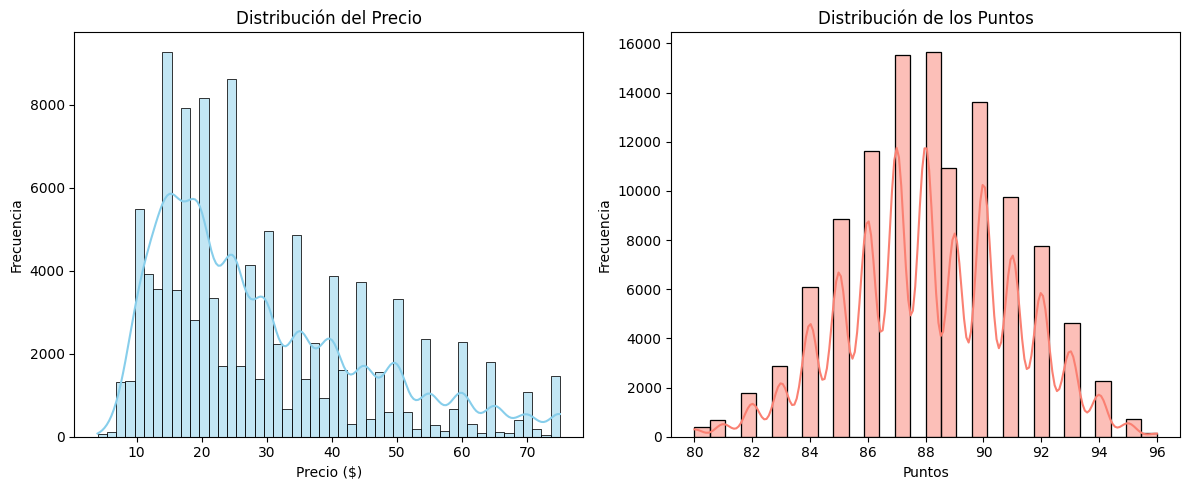

In [27]:
plt.figure(figsize=(12, 5))

# Distribución del Precio
plt.subplot(1, 2, 1)
sns.histplot(df['price'], kde=True, bins=50, color='skyblue')
plt.title('Distribución del Precio')
plt.xlabel('Precio ($)')
plt.ylabel('Frecuencia')

# Distribución de los Puntos
plt.subplot(1, 2, 2)
sns.histplot(df['points'], kde=True, bins=30, color='salmon')
plt.title('Distribución de los Puntos')
plt.xlabel('Puntos')
plt.ylabel('Frecuencia')

plt.tight_layout()
plt.show()


Usamos el coeficiente de correlación de Pearson para ver cual es la correlacion entre ambos:

In [17]:
correlacion = df['price'].corr(df['points'])print(f'Coeficiente de correlación (Pearson): {correlacion:.2f}')


Coeficiente de correlación (Pearson): 0.54


Debido a la variedad de los datos procedemos a mostrar los mas relevantes.

Precio promedio por país (top 10 países)


<ipython-input-18-489b20cdb2c5>:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='country', y='price', data=df_top_countries, estimator='mean', ci=None)


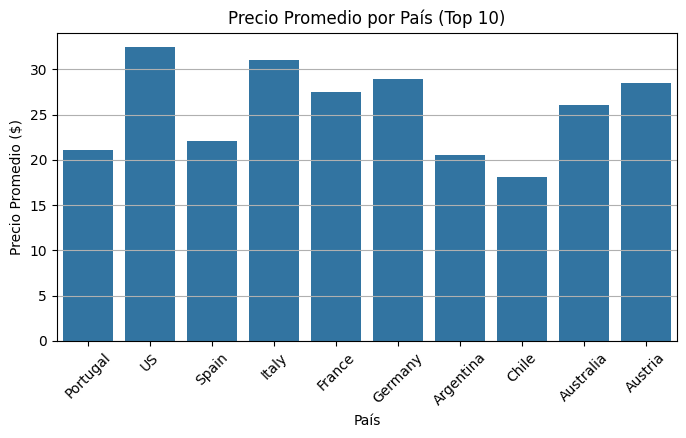

In [18]:
# Top 10 países con más vinos en el dataset
top_countries = df['country'].value_counts().head(10).index

# Filtrar el dataset solo a esos países
df_top_countries = df[df['country'].isin(top_countries)]

# Gráfico de precio promedio por país
plt.figure(figsize=(8,4))
sns.barplot(x='country', y='price', data=df_top_countries, estimator='mean', ci=None)
plt.title('Precio Promedio por País (Top 10)')
plt.xlabel('País')
plt.ylabel('Precio Promedio ($)')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


Puntuación promedio por variedad (top 10 variedades)

<ipython-input-19-27d506775274>:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='variety', y='points', data=df_top_varieties, estimator='mean', ci=None)


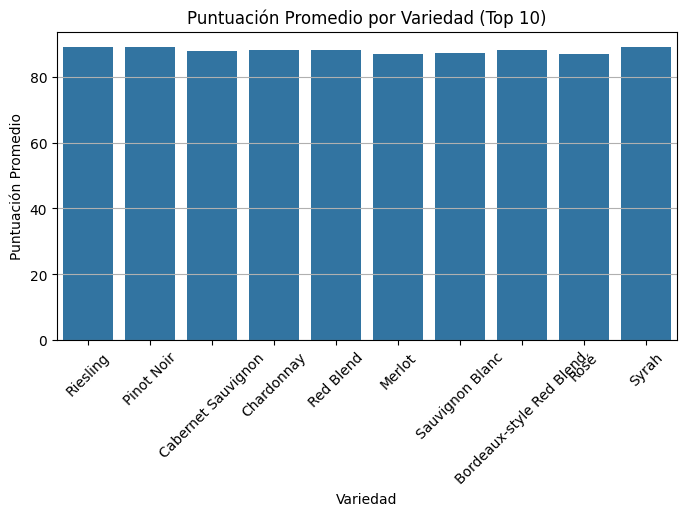

In [19]:
# Top 10 variedades más comunes
top_varieties = df['variety'].value_counts().head(10).index

# Filtrar solo esas variedades
df_top_varieties = df[df['variety'].isin(top_varieties)]

# Gráfico de puntuación promedio por variedad
plt.figure(figsize=(8,4))
sns.barplot(x='variety', y='points', data=df_top_varieties, estimator='mean', ci=None)
plt.title('Puntuación Promedio por Variedad (Top 10)')
plt.xlabel('Variedad')
plt.ylabel('Puntuación Promedio')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


Podemos observar en los graficos que Estados Unidos y Europa tiene precios mucho mas altos que los vinos Argentinos.
Con respecto a variedades vemos que no hay variedades que se destaquen del resto. En ese aspectos son similares las puntuacion independientemente de la variedad.



# **Desarrollo:**

##Relación entre Precio y Puntos
Se utilizó un gráfico de dispersión para analizar visualmente la relación entre el precio de los vinos y su puntuación.

In [20]:
import plotly.express as px

# Scatter plot interactivo
fig = px.scatter(
    df,
    x='price',
    y='points',
    title='Relación entre Precio y Puntos de Vinos',
    labels={'price':'Precio ($)', 'points':'Puntos'},
    opacity=0.5,
    trendline='ols'  # Ajuste de regresión lineal
)

fig.show()


**Análisis**:
Se observa una leve correlación positiva entre el precio y los puntos: a mayor precio, tiende a observarse una mayor puntuación. Sin embargo, la dispersión de los datos indica que existen vinos accesibles con buenas puntuaciones, así como vinos caros con puntuaciones promedio. Esto sugiere que el precio no es el único determinante de la calidad percibida.




##Distribución de Puntos por País
Se construyó un gráfico de cajas considerando los cinco países con mayor cantidad de vinos en el dataset.


In [21]:
# Seleccionar los 5 países con más vinos
top_countries = df['country'].value_counts().head(5).index

# Filtrar el dataset
df_top_countries = df[df['country'].isin(top_countries)]


In [22]:
# Boxplot interactivo
fig = px.box(
    df_top_countries,
    x='country',
    y='points',
    title='Distribución de Puntos por País (Top 5)',
    labels={'country':'País', 'points':'Puntos'},
    points='all'  # Para mostrar todos los puntos individuales
)

fig.show()


**Análisis**:
Entre los países analizados, se observa que presentan medianas de puntuación similares. Estados Unidos, aunque con amplia presencia en el dataset, muestra mayor dispersión en la calidad. Tambien se logra ver en algunos casos, varios casos atipicos (outliers).

##Precio Promedio por Variedad
Se analizó el precio promedio de las cinco variedades de vino más representadas.

In [23]:
# Seleccionar las 5 variedades más frecuentes
top_varieties = df['variety'].value_counts().head(5).index

# Filtrar el dataset
df_top_varieties = df[df['variety'].isin(top_varieties)]


In [24]:
# Barplot interactivo
fig = px.bar(
    df_top_varieties,
    x='variety',
    y='price',
    title='Precio Promedio por Variedad (Top 5)',
    labels={'variety':'Variedad', 'price':'Precio Promedio ($)'},
    color='variety',
    barmode='group',
    height=500,
    template='plotly_white'
)

# Usamos el promedio como métrica de agregación
fig.update_traces(
    marker_line_color='black',
    marker_line_width=1.5,
    opacity=0.8
)

# Ajustamos para mostrar el promedio real
fig.update_layout(
    yaxis_title="Precio Promedio ($)",
    xaxis_title="Variedad de Vino"
)

fig.show()


**Análisis**:
Variedades como Pinot Noir presentan precios promedio más elevados en comparación con el resto teniendo en cuenta las variedades que mas aparecen en el Dataset. Con un trabajo posterior podriamos ver si el prestigio de la variedad o su publicidad son los causantes de dicho resultado.

##Matriz de Correlación
Finalmente, se analizó la matriz de correlación entre las variables numéricas principales.

In [25]:
# Seleccionar solo las variables numéricas de interés
correlation_matrix = df[['price', 'points']].corr()


In [26]:
# Heatmap interactivo
fig = px.imshow(
    correlation_matrix,
    text_auto=True,
    color_continuous_scale='RdBu_r',
    title='Matriz de Correlación: Precio y Puntos'
)

fig.show()


**Análisis**:
La correlación entre precio y puntos resultó ser moderadamente positiva. Esta relación confirma lo observado en el scatter plot, aunque la fuerza de la correlación sugiere que otros factores también impactan en la puntuación de los vinos.

# **Conclusión:**

En este trabajo se plantearon las siguientes preguntas:

1. ¿Existe una relación entre el precio del vino y la puntuación otorgada?
Según el análisis realizado, se observa que hay una relacion directa entre ambos atributos aunque la misma no es muy fuerte. Esto sugiere que se puede acceder a muy buenos vinos sin la necesidad de pagar importantes sumas de dinero.

2. ¿Qué países o variedades de vino presentan precios o puntuaciones más altas en promedio?
Los gráficos comparativos muestran que Europa y Estados Unidos tienen precios mayores en el mercado. Esto indica que dichas regiones tienen mejores valoracion por parte de publico consumidor. Los mismo ocurre con el tema de Variedades donde se destaca el Pinot Noir.

Para un proximo trabajo quedaria evaluar cuales son los factores que producen estas diferencias de precios ya sea por region o por variedad.